| **Inicio** | **atrás 13** | **Siguiente 15** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./13_Machine_Learning.ipynb)| [⏩](./15_Machine_Learning.ipynb)

# **131. Regresión de crestas, Código y análisis**

La regresión de crestas, también conocida como regresión Ridge, es una técnica de regularización que se utiliza para evitar el sobreajuste (overfitting) en modelos de regresión lineal. La principal diferencia entre la regresión lineal y la regresión de crestas es que la última agrega una penalización a los coeficientes de la regresión para mantenerlos lo más pequeños posible. Esto ayuda a reducir la complejidad del modelo y, por lo tanto, evita el sobreajuste.

A continuación, te proporciono un ejemplo en Python utilizando scikit-learn para implementar la regresión de crestas y visualizar los resultados:

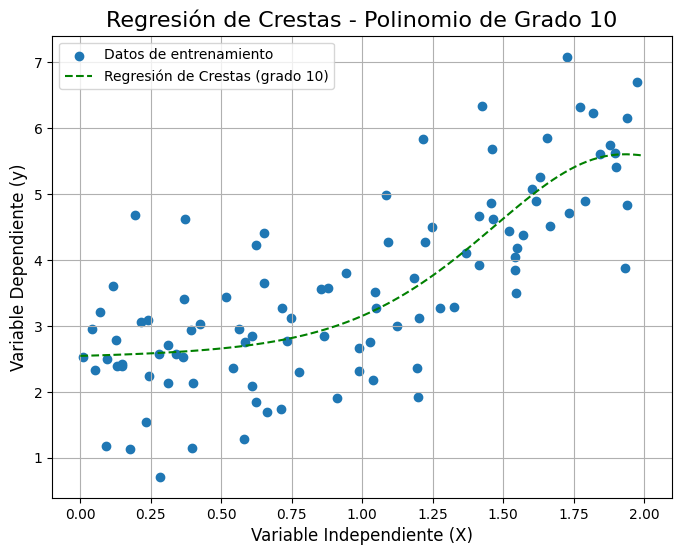

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Crear datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Ajustar regresión de crestas (ridge) con un polinomio de grado 10
degree = 10
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))  # 'alpha' es el parámetro de regularización
ridge_model.fit(X, y)

# Visualizar los resultados
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_new = ridge_model.predict(X_new)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_new, y_new, 'g--', label=f'Regresión de Crestas (grado {degree})')
plt.title('Regresión de Crestas - Polinomio de Grado 10', fontsize=16)
plt.xlabel('Variable Independiente (X)', fontsize=12)
plt.ylabel('Variable Dependiente (y)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

En este código:

1. **Creación de datos de ejemplo**: Generamos datos de ejemplo con una relación cuadrática $(y = 0.5X^2 + X + 2 + \text{ruido})$.

2. **Ajuste de regresión de crestas con un polinomio de grado 10**: Utilizamos `PolynomialFeatures` para generar características polinómicas y luego ajustamos un modelo de regresión de crestas (ridge) a estos datos expandidos. El parámetro `alpha` controla la fuerza de la regularización.

3. **Visualización de los resultados**: Creamos un gráfico que muestra los datos de entrenamiento y la curva de regresión de crestas.

La regresión de crestas es especialmente útil cuando tienes características altamente correlacionadas, ya que ayuda a estabilizar los coeficientes del modelo. La elección del valor de `alpha` es crucial y puede requerir ajuste mediante técnicas como validación cruzada. Un `alpha` más alto conduce a una mayor regularización.

# **132. Árboles de decisión: introducción e intuición geométrica**

**Árboles de Decisión: Introducción e Intuición Geométrica**

Los árboles de decisión son un tipo de modelo de aprendizaje supervisado utilizado tanto para problemas de clasificación como de regresión. La idea principal es dividir el conjunto de datos en subconjuntos más pequeños basándose en características específicas, de modo que cada subconjunto sea más homogéneo en términos de la variable objetivo. La estructura del árbol es similar a un flujo de decisiones, donde cada nodo representa una pregunta sobre una característica y cada hoja representa una predicción.

**Intuición Geométrica:**

Imagina que estás tratando de tomar decisiones basadas en características observadas. Por ejemplo, supongamos que deseas predecir si una fruta es manzana o naranja basándote en su color y tamaño. Comienzas con una pregunta principal como "¿Es el color de la fruta rojo?" Si sí, puede ser una manzana; si no, pasas a otra pregunta, como "¿Es el tamaño mayor que cierto umbral?" y así sucesivamente.

Este proceso de realizar preguntas y dividir el conjunto de datos en ramas más pequeñas se representa en forma de árbol. Cada nodo del árbol es una pregunta sobre una característica, las ramas son las respuestas a esas preguntas, y las hojas son las predicciones.

**Ejemplo en Código y Visualización:**

Vamos a usar un conjunto de datos sencillo y visualizar un árbol de decisión en Python utilizando la biblioteca scikit-learn:

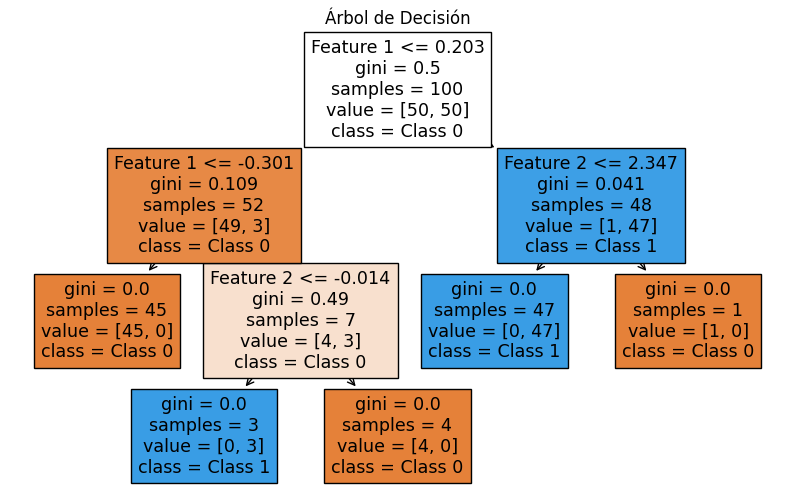

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Crear un conjunto de datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Crear y entrenar un árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Árbol de Decisión')
plt.show()

Este código:

1. Crea un conjunto de datos de ejemplo con dos características utilizando `make_classification`.
2. Entrena un árbol de decisión en el conjunto de datos.
3. Visualiza el árbol de decisión utilizando `plot_tree`.

La visualización del árbol mostrará cómo se realizan las divisiones en función de las características y cómo se llega a las predicciones en las hojas del árbol. Los nodos coloreados indican la clase predominante en ese nodo. Esta es una representación simplificada de un árbol de decisión, pero puedes ajustar la profundidad del árbol y otros hiperparámetros según sea necesario.

# **133. Entropía en árboles de decisión**

**Entropía en Árboles de Decisión**

La entropía es una medida de impureza o desorden en un conjunto de datos. En el contexto de los árboles de decisión, se utiliza la entropía para decidir cómo dividir un conjunto de datos en nodos. El objetivo es reducir la entropía en cada división, lo que lleva a subconjuntos más homogéneos y, por lo tanto, a árboles más eficaces para hacer predicciones.

**Fórmula de la Entropía:**

La fórmula de la entropía para un conjunto de datos binario (dos clases) es:

$H(S) = -p_1 \cdot \log_2(p_1) - p_2 \cdot \log_2(p_2)$

Donde:
- $H(S)$ es la entropía del conjunto de datos $(S)$.
- $(p_1)$ y $(p_2)$ son las proporciones de cada clase en el conjunto de datos.

**Entropía en la División:**

Cuando se decide cómo dividir un nodo en dos, se calcula la entropía para cada subconjunto resultante y se pondera por el tamaño de cada subconjunto. La reducción de la entropía (ganancia de información) se calcula restando la entropía ponderada de los subconjuntos de la entropía original del nodo.

$\text{Ganancia de Información} = H(\text{Nodo original}) - \left( \frac{N_1}{N} \cdot H(\text{Subconjunto 1}) + \frac{N_2}{N} \cdot H(\text{Subconjunto 2}) \right)$

Donde:
- $(N)$ es el tamaño del conjunto de datos original.
- $(N_1)$ y $(N_2)$ son los tamaños de los subconjuntos resultantes.

**Ejemplo en Código:**

Vamos a utilizar un ejemplo sencillo con scikit-learn para ilustrar la entropía en la toma de decisiones de un árbol:

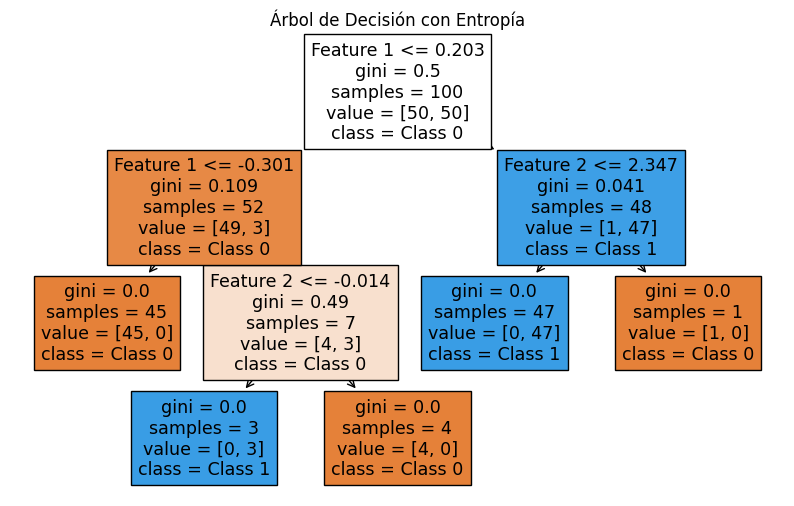

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Crear un conjunto de datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Crear y entrenar un árbol de decisión sin limitar la profundidad
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Árbol de Decisión con Entropía')
plt.show()

Este código:
1. Crea un conjunto de datos de ejemplo con dos características utilizando `make_classification`.
2. Entrena un árbol de decisión sin limitar la profundidad en el conjunto de datos.
3. Visualiza el árbol de decisión.

La visualización mostrará cómo se realiza la división en cada nodo y cómo se calcula la entropía para cada nodo. Puedes notar que en la parte superior del árbol (raíz), la división se realiza en función de la entropía y la ganancia de información.

# **134. Ganancia de información | Árboles de decisión**

**Ganancia de Información en Árboles de Decisión**

La ganancia de información es un concepto clave en árboles de decisión y se utiliza para determinar la mejor manera de dividir un conjunto de datos en nodos más homogéneos. La idea es seleccionar la división que maximice la reducción en la incertidumbre o la entropía del conjunto de datos original.

**Fórmula de la Ganancia de Información:**

$\text{Ganancia de Información} = \text{Entropía del Nodo Padre} - \text{Entropía Ponderada de los Nodos Hijos}$

$\text{Ganancia de Información} = H(\text{Nodo Padre}) - \left( \frac{N_1}{N} \cdot H(\text{Nodo Hijo 1}) + \frac{N_2}{N} \cdot H(\text{Nodo Hijo 2}) + \ldots \right)$

Donde:
- $H(\text{Nodo Padre})$ es la entropía del nodo padre.
- $(N_1, N_2, \ldots)$ son los tamaños de los nodos hijos resultantes de la división.
- $H(\text{Nodo Hijo 1}), H(\text{Nodo Hijo 2}), \ldots$ son las entropías de los nodos hijos.

**Ejemplo en Código:**

Vamos a utilizar scikit-learn para ilustrar la ganancia de información en un árbol de decisión:

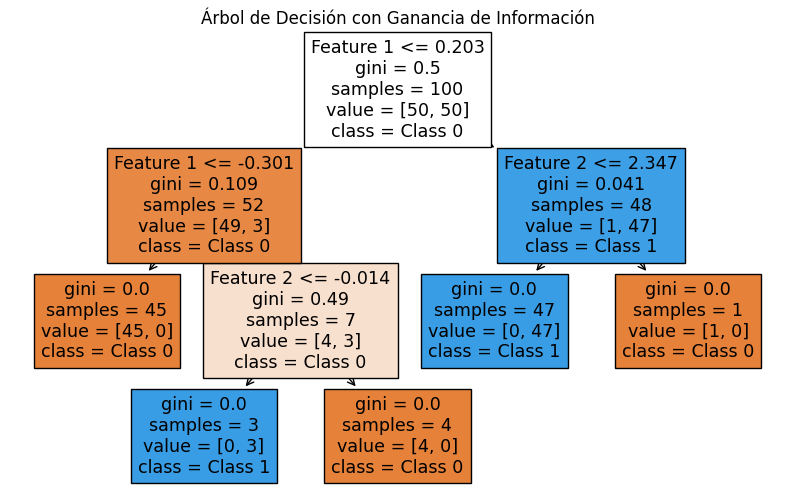

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Crear un conjunto de datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Crear y entrenar un árbol de decisión sin limitar la profundidad
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Árbol de Decisión con Ganancia de Información')
plt.show()

Este código:
1. Crea un conjunto de datos de ejemplo con dos características utilizando `make_classification`.
2. Entrena un árbol de decisión sin limitar la profundidad en el conjunto de datos.
3. Visualiza el árbol de decisión.

La visualización mostrará cómo se calcula la ganancia de información en cada nodo, destacando las divisiones que maximizan la homogeneidad en los nodos hijos. La ganancia de información es un criterio fundamental para construir árboles de decisión eficaces.

# **135. Gini Impureza en profundidad Intuición | Árboles de decisión**

**Gini Impurity en Árboles de Decisión**

La impureza de Gini es otra medida utilizada en árboles de decisión para evaluar la homogeneidad de un conjunto de datos. Mientras que la entropía mide la falta de orden o caos en un conjunto de datos, la impureza de Gini se centra en la probabilidad de clasificar incorrectamente un elemento del conjunto.

**Fórmula de la Impureza de Gini:**

$\text{Gini} = 1 - \sum_{i=1}^{c} p_i^2$

Donde:
- $(c)$ es el número de clases.
- $(p_i)$ es la probabilidad de que un elemento seleccionado aleatoriamente pertenezca a la clase $(i)$.

La impureza de Gini es mínima (0) cuando todos los elementos del nodo pertenecen a la misma clase y máxima (1) cuando se distribuyen uniformemente en todas las clases.

**Ejemplo en Código:**

Utilizaremos scikit-learn para ilustrar la impureza de Gini en un árbol de decisión:

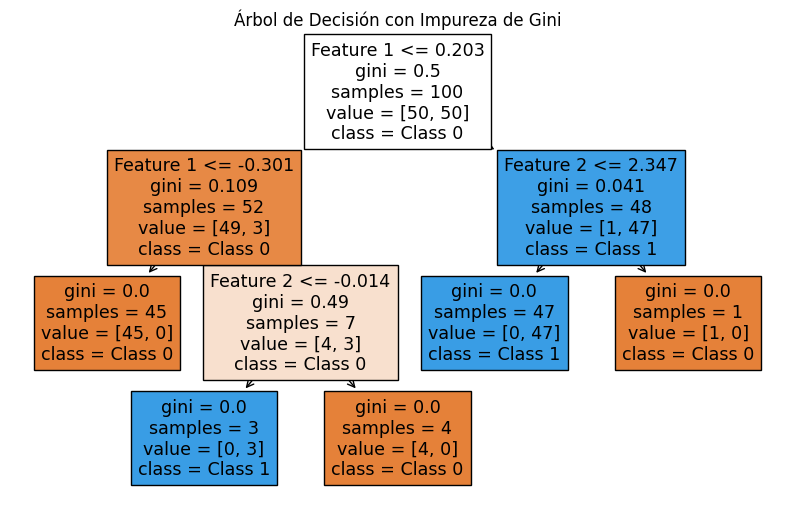

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Crear un conjunto de datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Crear y entrenar un árbol de decisión sin limitar la profundidad
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_clf.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Árbol de Decisión con Impureza de Gini')
plt.show()

Este código:
1. Crea un conjunto de datos de ejemplo con dos características utilizando `make_classification`.
2. Entrena un árbol de decisión utilizando la impureza de Gini como criterio.
3. Visualiza el árbol de decisión.

La visualización mostrará cómo se calcula la impureza de Gini en cada nodo, resaltando las divisiones que minimizan la probabilidad de clasificar incorrectamente los elementos en los nodos hijos. La impureza de Gini es una alternativa común a la entropía como criterio de división en árboles de decisión.

# **136. Manejo de valores numéricos en árboles de decisión**

**Manejo de Valores Numéricos en Árboles de Decisión**

Cuando trabajamos con árboles de decisión, a menudo nos encontramos con características que son numéricas en lugar de categóricas. La pregunta clave es: ¿cómo decidimos dónde hacer las divisiones en estos valores numéricos? Aquí, exploraremos dos enfoques comunes para manejar valores numéricos en árboles de decisión: clasificación binaria y particiones múltiples.

**Clasificación Binaria:**

En este enfoque, se elige un umbral y se clasifican los valores de la característica en dos categorías: aquellos que son menores o iguales al umbral y aquellos que son mayores al umbral. Esto se repite recursivamente en cada nodo.

**Ejemplo en Código:**

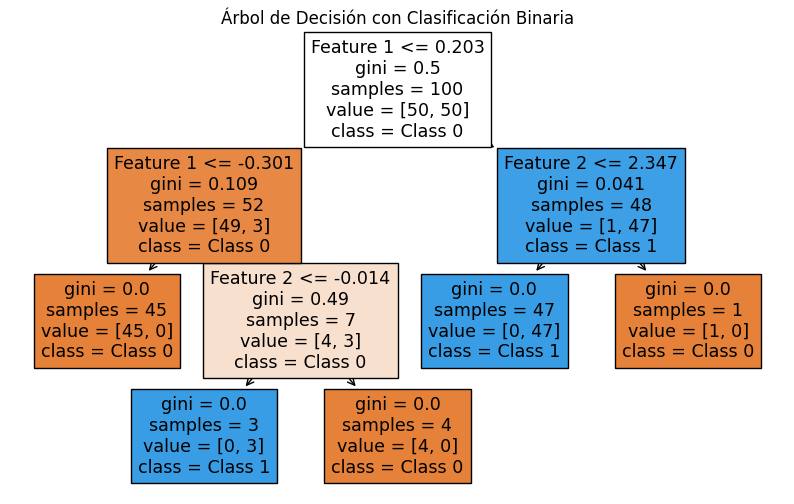

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Crear un conjunto de datos de ejemplo con dos características
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Crear y entrenar un árbol de decisión con clasificación binaria
tree_clf_binary = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)
tree_clf_binary.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree_clf_binary, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Árbol de Decisión con Clasificación Binaria')
plt.show()

**Particiones Múltiples:**

En lugar de realizar una clasificación binaria, en este enfoque se selecciona un umbral y se dividen los valores de la característica en más de dos categorías. Esto puede llevar a árboles más complejos pero también más expresivos.

**Ejemplo en Código:**

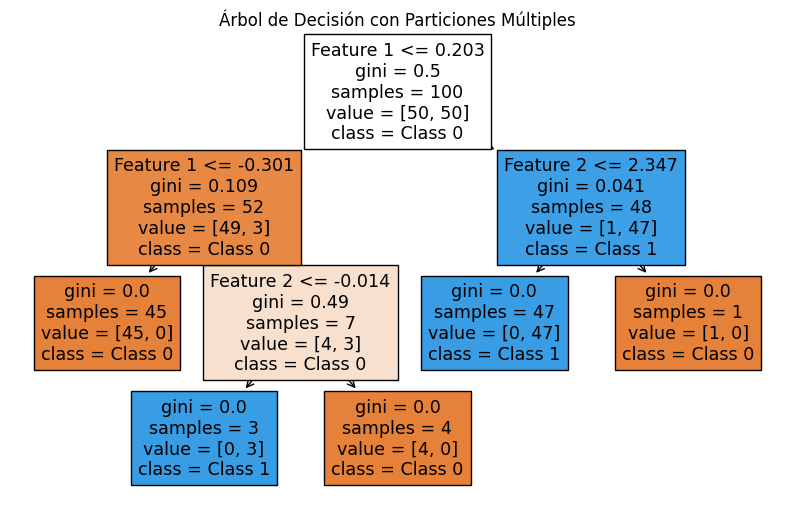

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Crear un conjunto de datos de ejemplo con dos características
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Crear y entrenar un árbol de decisión con clasificación binaria
tree_clf_multi = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)
tree_clf_multi.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree_clf_multi, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Árbol de Decisión con Particiones Múltiples')
plt.show()

Estos ejemplos utilizan el conjunto de datos con una sola característica para simplificar la visualización. En la práctica, los árboles de decisión manejan múltiples características y ajustan umbrales para cada una durante el proceso de entrenamiento. La elección entre clasificación binaria y particiones múltiples dependerá de la naturaleza del problema y la interpretación del modelo resultante.

# **137. Sobreajuste en árboles de decisión**

El sobreajuste (overfitting) es un fenómeno común en el aprendizaje automático y puede ocurrir cuando un modelo se adapta demasiado a los detalles y el ruido específico de los datos de entrenamiento, en lugar de capturar la relación subyacente que se aplica a datos nuevos no vistos. En el caso de los árboles de decisión, el sobreajuste puede manifestarse como árboles muy profundos y específicos del conjunto de entrenamiento.

Aquí hay una explicación detallada del sobreajuste en árboles de decisión con ejemplos en código y visualizaciones:

**1. Sobreajuste en Árboles de Decisión:**

Los árboles de decisión tienen una tendencia natural a ajustarse demasiado a los datos de entrenamiento, especialmente si no se restringen en términos de profundidad (número máximo de niveles) u otros parámetros. Un árbol profundo puede aprender patrones específicos del conjunto de entrenamiento que no generalizan bien a nuevos datos.

**2. Ejemplo de Sobreajuste:**

Vamos a crear un conjunto de datos simple y entrenar dos árboles de decisión, uno con poca profundidad y otro con mucha profundidad para ilustrar el sobreajuste.

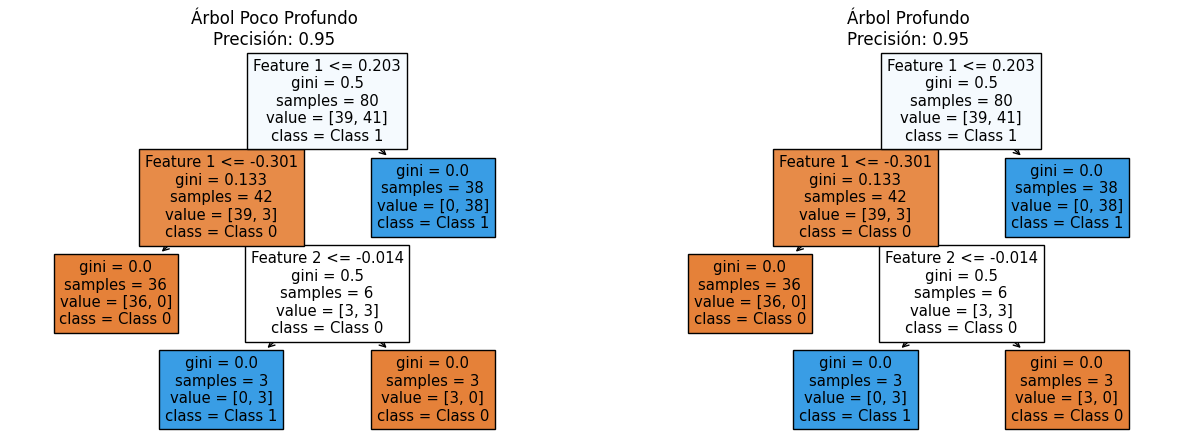

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar árbol poco profundo (evitar sobreajuste)
tree_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_shallow.fit(X_train, y_train)

# Entrenar árbol profundo (propenso a sobreajuste)
tree_deep = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_deep.fit(X_train, y_train)

# Predecir en los conjuntos de prueba
y_pred_shallow = tree_shallow.predict(X_test)
y_pred_deep = tree_deep.predict(X_test)

# Calcular la precisión en los conjuntos de prueba
accuracy_shallow = accuracy_score(y_test, y_pred_shallow)
accuracy_deep = accuracy_score(y_test, y_pred_deep)

# Visualizar los árboles y resultados
plt.figure(figsize=(15, 5))

# Árbol poco profundo
plt.subplot(1, 2, 1)
plot_tree(tree_shallow, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title(f'Árbol Poco Profundo\nPrecisión: {accuracy_shallow:.2f}')

# Árbol profundo
plt.subplot(1, 2, 2)
plot_tree(tree_deep, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title(f'Árbol Profundo\nPrecisión: {accuracy_deep:.2f}')

plt.show()

**3. Resultados y Conclusiones:**

- El árbol poco profundo (con restricciones) generaliza mejor y tiene una precisión razonable en el conjunto de prueba.
- El árbol profundo (sin restricciones) se ajusta demasiado a los datos de entrenamiento, capturando detalles específicos que no son representativos de la relación general. Tiene una precisión alta en el conjunto de entrenamiento, pero baja en el conjunto de prueba.

**4. Consejos para Evitar el Sobreajuste en Árboles de Decisión:**

- **Limitar la Profundidad del Árbol:** Especificar un valor para `max_depth` limita la profundidad del árbol.
- **Número Mínimo de Muestras por Hoja (`min_samples_leaf`):** Especificar un número mínimo de muestras por hoja evita particiones que llevan a nodos con muy pocas muestras.
- **Número Mínimo de Muestras para Dividir (`min_samples_split`):** Especificar un número mínimo de muestras para realizar una división también puede ser útil.

Ajustar estos parámetros puede ayudar a controlar el sobreajuste y mejorar la generalización del modelo.

# **138. Hiperparámetros del árbol de decisión Intuición profunda**

Los árboles de decisión son modelos versátiles y poderosos en el aprendizaje automático, pero su rendimiento puede depender en gran medida de cómo se configuran sus hiperparámetros. Los hiperparámetros son configuraciones que no se aprenden directamente del conjunto de datos, y ajustarlos adecuadamente es crucial para obtener modelos efectivos.

**1. Hiperparámetros del Árbol de Decisión:**

**a. `max_depth`:**

   - **Definición:** La máxima profundidad del árbol.
   - **Intuición:** Controla la longitud máxima del camino desde la raíz hasta una hoja. Evita árboles demasiado profundos que se ajustan demasiado a los datos de entrenamiento.
   - **Ejemplo de Código:**

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)

**b. `min_samples_split`:**

   - **Definición:** Número mínimo de muestras requeridas para dividir un nodo interno.
   - **Intuición:** Evita divisiones que generan nodos con un número muy pequeño de muestras, lo que ayuda a prevenir el sobreajuste.
   - **Ejemplo de Código:**

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_split=5)

**c. `min_samples_leaf`:**

   - **Definición:** Número mínimo de muestras requeridas en una hoja.
   - **Intuición:** Establece el número mínimo de muestras que debe tener una hoja. Evita que se creen hojas con muy pocas muestras.
   - **Ejemplo de Código:**

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_leaf=2)

**d. `max_features`:**

   - **Definición:** Número máximo de características consideradas para dividir un nodo.
   - **Intuición:** Limita el número de características que el algoritmo examina para realizar una división. Puede mejorar la generalización.
   - **Ejemplo de Código:**

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_features='sqrt')

**2. Ejemplo de Visualización:**

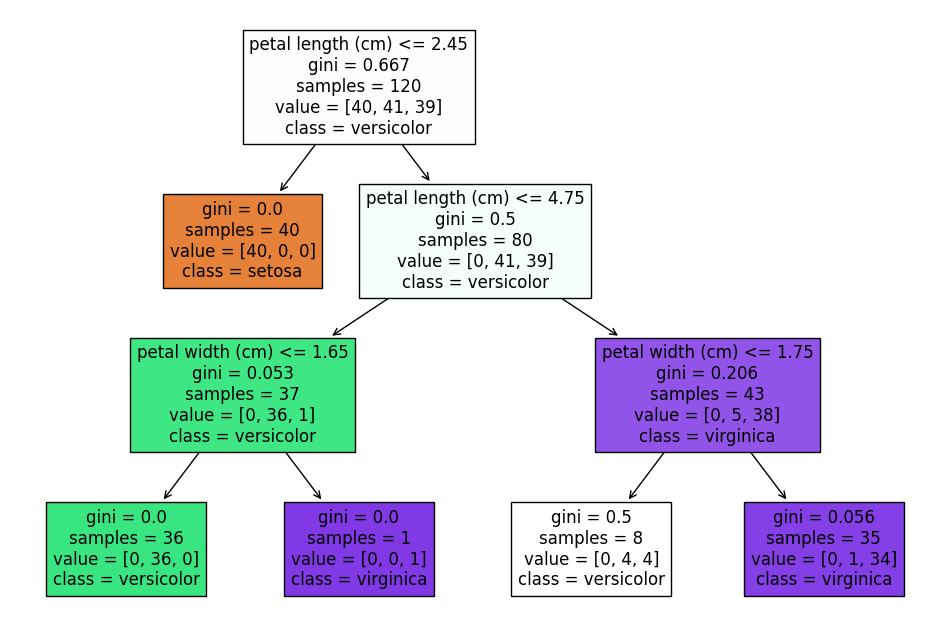

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Entrenar un árbol de decisión con hiperparámetros específicos
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5)
tree.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names.tolist())
plt.show()

**3. Resultados y Conclusiones:**

- Al ajustar estos hiperparámetros, se puede controlar la complejidad del árbol y evitar el sobreajuste.
- La visualización del árbol proporciona una comprensión clara de cómo se toman las decisiones en cada nodo.

Ajustar estos hiperparámetros según la naturaleza del conjunto de datos puede mejorar la capacidad de generalización del modelo y su rendimiento en datos no vistos.

# **139. Ajuste de hiperparámetros usando GridSearchCV**

El ajuste de hiperparámetros es una parte crucial del proceso de modelado, y `GridSearchCV` es una herramienta poderosa que te permite explorar diferentes combinaciones de hiperparámetros automáticamente. Aquí hay una explicación detallada con ejemplos en código y visualización:

**Ajuste de Hiperparámetros con GridSearchCV**

1. **Importa las bibliotecas necesarias:**

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

2. **Cargar el conjunto de datos y dividirlo en conjuntos de entrenamiento y prueba:**

In [18]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

3. **Definir el modelo y los hiperparámetros para explorar:**

In [19]:
model = RandomForestClassifier()
param_grid = {
       'n_estimators': [50, 100, 150],
       'max_depth': [None, 10, 20],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4]}

Aquí, estamos explorando diferentes combinaciones de `n_estimators`, `max_depth`, `min_samples_split`, y `min_samples_leaf` para un modelo de bosque aleatorio.

4. **Crear un objeto GridSearchCV:**

In [20]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

   - `cv`: Número de divisiones para la validación cruzada.
   - `scoring`: La métrica que se utiliza para evaluar el rendimiento del modelo.
   - `verbose`: Controla la cantidad de mensajes que se imprimen durante el proceso.
   - `n_jobs`: Número de trabajadores a utilizar para la búsqueda en paralelo.

5. **Ajustar el modelo al conjunto de datos de entrenamiento con búsqueda de cuadrícula:**

In [21]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

6. **Obtener los mejores hiperparámetros y el mejor modelo:**

In [22]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Los mejores hiperparámetros y el mejor modelo se seleccionan automáticamente durante el proceso de búsqueda.

7. **Evaluar el modelo en el conjunto de prueba:**

In [23]:
test_accuracy = best_model.score(X_test, y_test)

**Visualización de los Resultados**

Puedes visualizar los resultados del GridSearchCV para analizar cómo cambia el rendimiento del modelo con diferentes combinaciones de hiperparámetros. Aquí hay un ejemplo de visualización utilizando pandas y seaborn:

/tmp/ipykernel_736/429927566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_results.loc[:, 'params_str'] = grid_results['params'].astype(str)


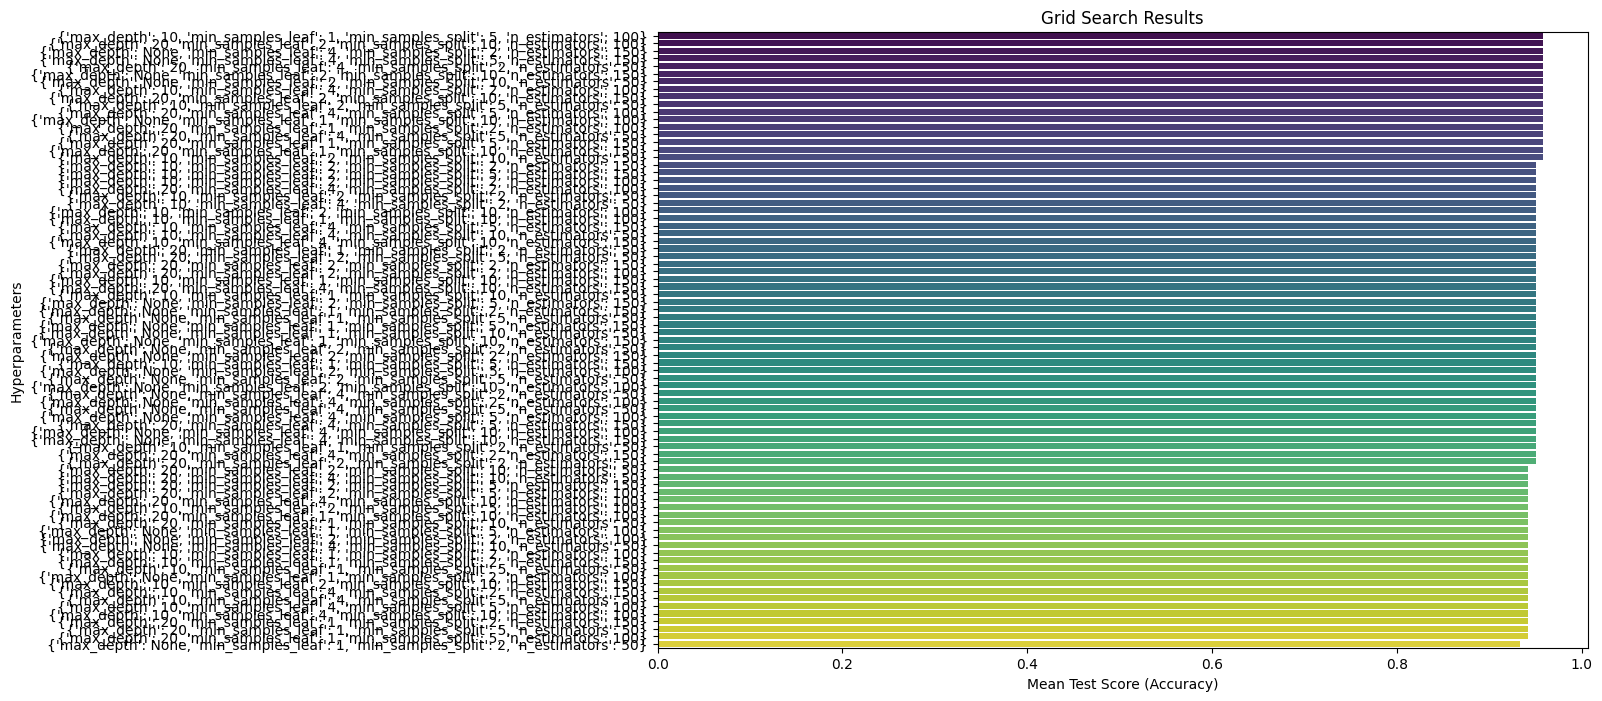

In [28]:
# Extract relevant columns from results for visualization
grid_results = results[['params', 'mean_test_score']]

# Convert the 'params' column to a string for better visualization
grid_results.loc[:, 'params_str'] = grid_results['params'].astype(str)

# Visualize the performance in terms of mean test score
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_test_score', y='params_str', data=grid_results, palette='viridis')
plt.title('Grid Search Results')
plt.xlabel('Mean Test Score (Accuracy)')
plt.ylabel('Hyperparameters')
plt.show()

Esta visualización te dará una idea clara de qué combinación de hiperparámetros proporciona el mejor rendimiento en términos de la métrica especificada. Asegúrate de ajustar los detalles según tus necesidades y el algoritmo específico que estés utilizando.

# **140. Clasificador de escritura a mano mediante árboles de decisión**

Para crear un clasificador de escritura a mano utilizando árboles de decisión, podemos utilizar el conjunto de datos de dígitos escritos a mano disponible en la biblioteca `scikit-learn`. Aquí hay un ejemplo detallado con código y visualización:

Precisión del modelo: 0.84
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



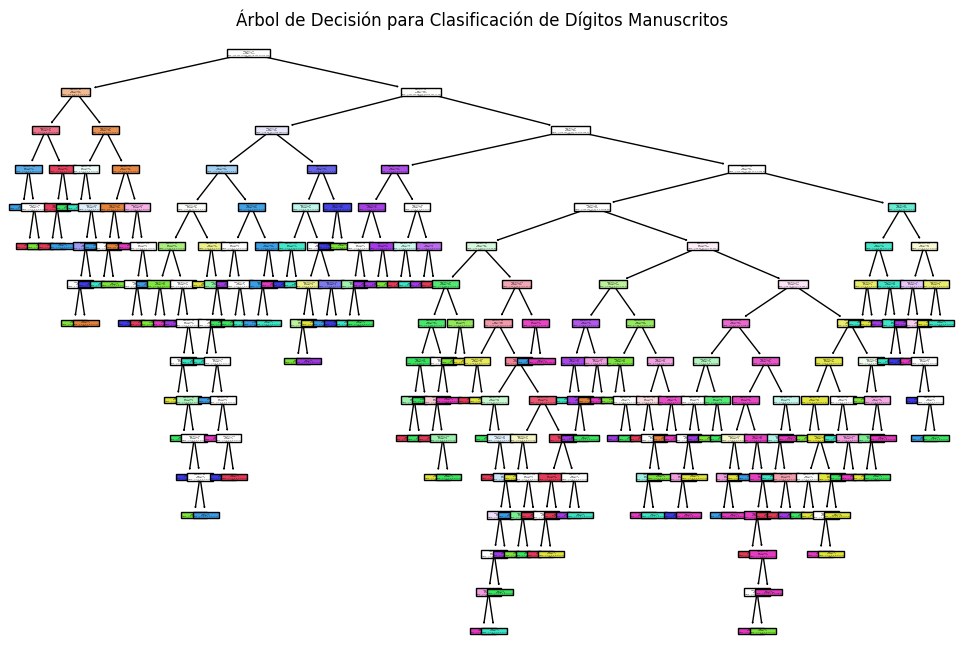

In [29]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos de dígitos escritos a mano
digits = load_digits()

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Crear y entrenar un árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar un informe de clasificación detallado
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, filled=True, feature_names=[f"Pixel {i}" for i in range(64)], class_names=[str(i) for i in range(10)])
plt.title("Árbol de Decisión para Clasificación de Dígitos Manuscritos")
plt.show()

Explicación del código:

1. Importamos las bibliotecas necesarias, incluyendo `matplotlib` para la visualización y varias clases de `scikit-learn` para cargar datos, dividir conjuntos, construir el clasificador y evaluar el rendimiento.

2. Cargamos el conjunto de datos de dígitos escritos a mano.

3. Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba.

4. Creamos y entrenamos un clasificador de árbol de decisión.

5. Realizamos predicciones en el conjunto de prueba y calculamos la precisión del modelo.

6. Mostramos un informe de clasificación detallado que incluye precision, recall, f1-score y support para cada clase.

7. Visualizamos el árbol de decisión para entender cómo toma decisiones el modelo.

Este código utiliza un árbol de decisión para clasificar imágenes de dígitos escritos a mano. Puedes ajustar los parámetros del árbol de decisión y experimentar con diferentes configuraciones para mejorar el rendimiento del modelo.

| **Inicio** | **atrás 13** | **Siguiente 15** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./13_Machine_Learning.ipynb)| [⏩](./15_Machine_Learning.ipynb)